## Exploratory Data Analysis

Dataset-1: Cleaned_Outreach.csv

importing necessary libraries

In [3]:
import pandas as pd

Loading Dataset and and inspecting

In [4]:
outreach_df = pd.read_csv("Cleaned_OutreachData.csv")

# Inspect dataset
print(outreach_df.head())
print(outreach_df.info())
print(outreach_df.describe())

   Reference_ID          Received_At                        University  \
0         12345  2023-04-28 12:15:19  Illinois Institute of Technology   
1         12345  2023-04-28 13:04:05  Illinois Institute of Technology   
2         12345  2023-05-01 11:14:11  Illinois Institute of Technology   
3        347397  2023-05-01 11:16:09  Illinois Institute of Technology   
4        347397  2023-05-01 11:18:02  Illinois Institute of Technology   

  Caller_Name      Outcome_1     Remark Campaign_ID Escalation_Required  
0     Shailja      Connected  No Remark      IANF23                  No  
1     Shailja     Reschedule  No Remark      IANF23                  No  
2     Shailja      Connected  No Remark      IANF23                  No  
3        Isha  Not connected  No Remark      IANF23                  No  
4        Isha      Connected  No Remark      IANF23                  No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33118 entries, 0 to 33117
Data columns (total 8 columns):
 # 

1. Checking outreach volume over time - Line Chart

      Month  Outreach_Count
0   2023-04               2
1   2023-05            3581
2   2023-07            1403
3   2024-03            3398
4   2024-04            2124
5   2024-05            1089
6   2024-06            6249
7   2024-07            5845
8   2024-08             166
9   2024-09             642
10  2024-10            1997
11  2024-11            4256
12  2024-12            2366


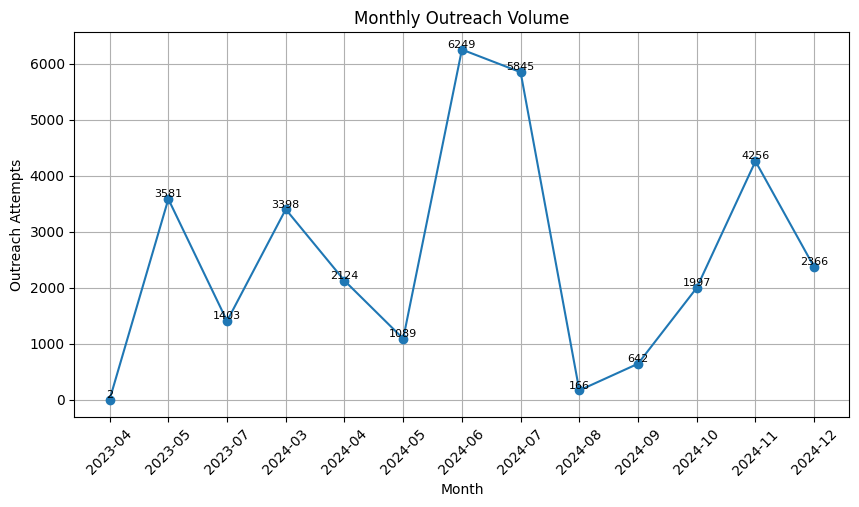

In [5]:
# Convert 'Received_At' to datetime
outreach_df['Received_At'] = pd.to_datetime(outreach_df['Received_At'])

# Extract month and year
outreach_df['Month'] = outreach_df['Received_At'].dt.to_period('M')

# Outreach volume per month
monthly_volume = outreach_df.groupby('Month')['Reference_ID'].count().reset_index()
monthly_volume.rename(columns={'Reference_ID': 'Outreach_Count'}, inplace=True)
print(monthly_volume)

# Visualization with values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_volume['Month'].astype(str), monthly_volume['Outreach_Count'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Outreach Volume')
plt.xlabel('Month')
plt.ylabel('Outreach Attempts')
plt.grid(True)

# Add value labels on points
for x, y in zip(monthly_volume['Month'].astype(str), monthly_volume['Outreach_Count']):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', fontsize=8)

plt.show()


Interpretation:

Identify trends in outreach activity over time.

Spot seasonal spikes or dips.

2. Outreach volume by University - bar chart

                         University  Outreach_Count
0  Illinois Institute of Technology           33118


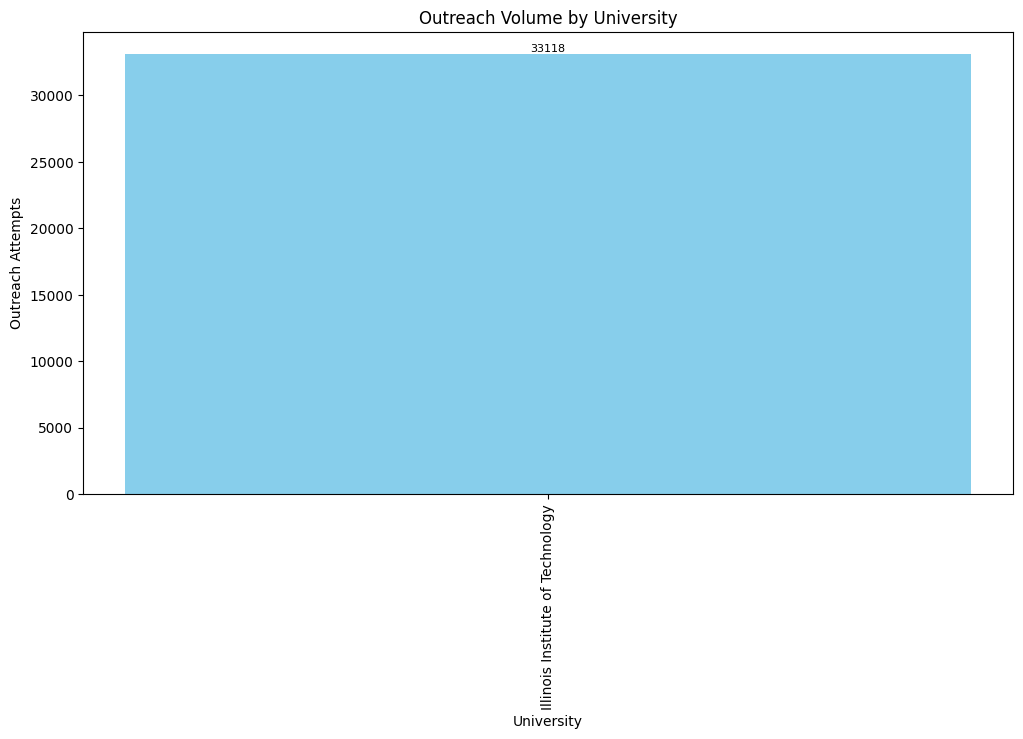

In [6]:
university_volume = outreach_df.groupby('University')['Reference_ID'].count().sort_values(ascending=False).reset_index()
university_volume.rename(columns={'Reference_ID': 'Outreach_Count'}, inplace=True)
print(university_volume.head(10))

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(university_volume['University'], university_volume['Outreach_Count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Outreach Volume by University')
plt.xlabel('University')
plt.ylabel('Outreach Attempts')

# Add value labels beside each university name
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.show()

Interpretation:

Identify which universities received the most outreach.

Useful for segment-level insights.

3. Response/outcome analysis - Top 10 Horizontal bar chart

                                             Outcome  Count
0                                      Not connected  21878
1                               Will Submit the docx   3910
2                                       Disconnected   1350
3                                       Wrong number   1081
4                              Not interested to IIT   1000
5                              Completed application    780
6                                         Reschedule    414
7                                 Will confirm later    375
8                           Ready to pay the deposit    339
9  Student has the needed information, does not n...    326


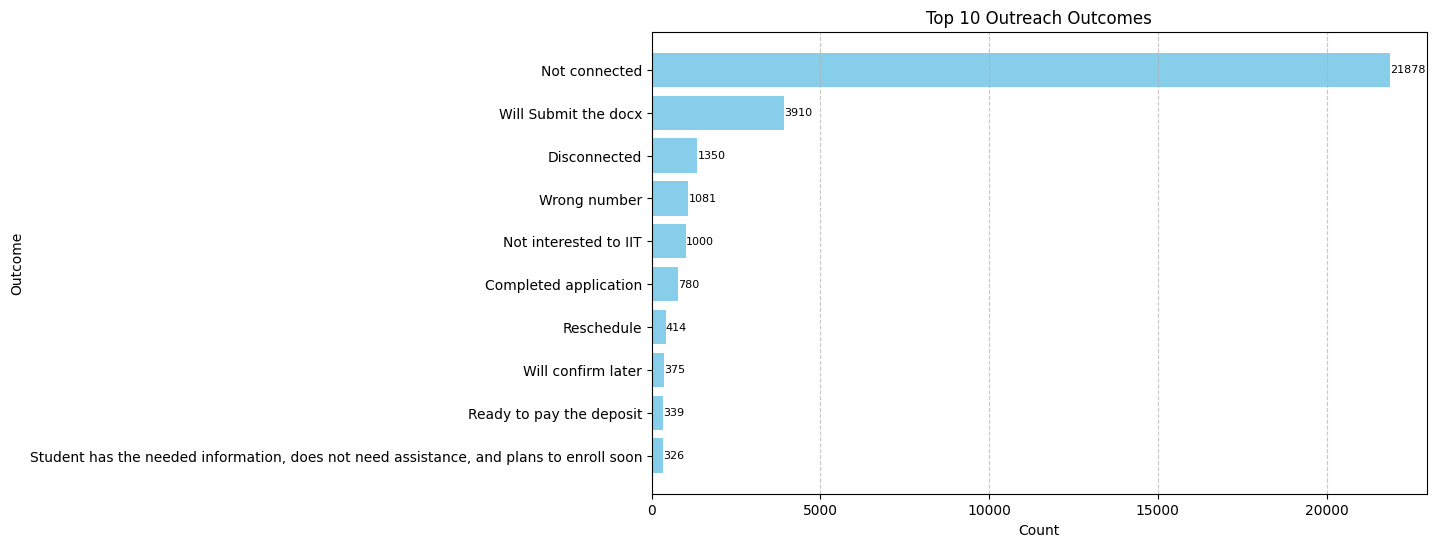

In [7]:
# Count of outcomes (Top 10)
outcome_counts = outreach_df['Outcome_1'].value_counts().reset_index().head(10)
outcome_counts.columns = ['Outcome', 'Count']
print(outcome_counts)

# Horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(outcome_counts['Outcome'], outcome_counts['Count'], color='skyblue')
plt.gca().invert_yaxis()  # So the highest bar appears on top
plt.title('Top 10 Outreach Outcomes')
plt.xlabel('Count')
plt.ylabel('Outcome')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=8)

plt.show()

Interpretation:

Understand engagement: how many responded, declined, or were unreachable.

4. Attempt effectiveness- top 10 most frequent contact attempt outcomes- bar chart

                                            Outcome_1  Count
14                                      Not connected  21878
35                               Will Submit the docx   3910
7                                        Disconnected   1350
39                                       Wrong number   1081
16                              Not interested to IIT   1000
5                               Completed application    780
19                                         Reschedule    414
36                                 Will confirm later    375
18                           Ready to pay the deposit    339
22  Student has the needed information, does not n...    326


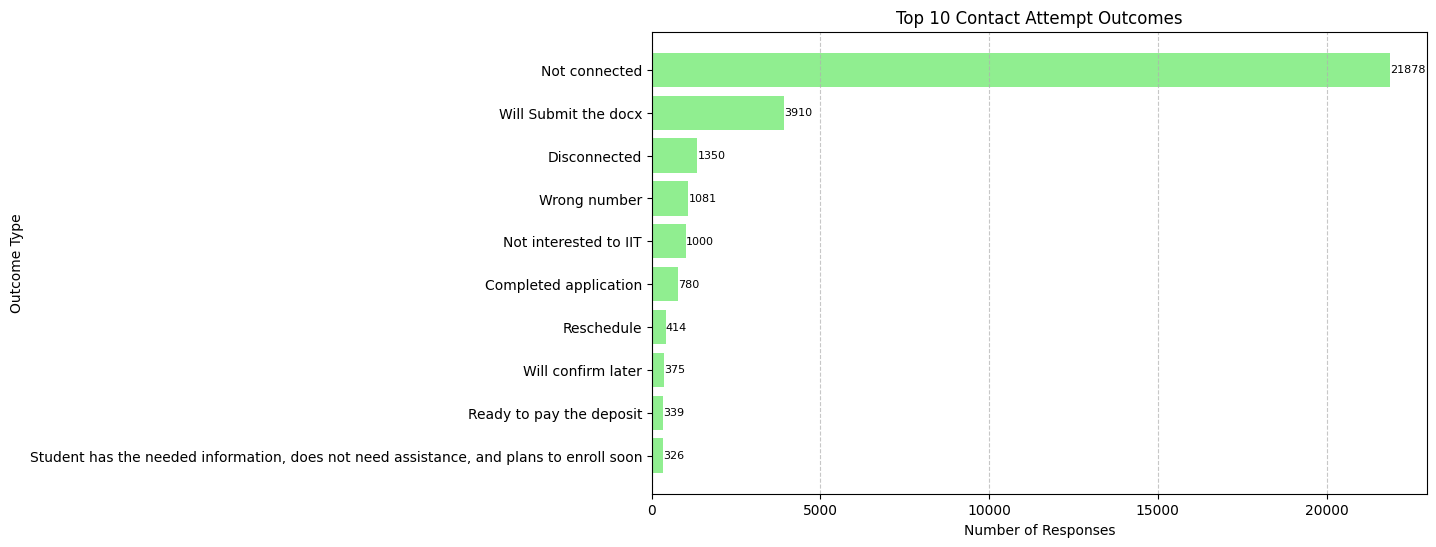

In [8]:
# Top 10 effectiveness by contact attempt
attempt_effectiveness = (
    outreach_df.groupby('Outcome_1')['Reference_ID']
    .count()
    .reset_index()
    .rename(columns={'Reference_ID': 'Count'})
    .sort_values(by='Count', ascending=False)
    .head(10)
)

print(attempt_effectiveness)

# Horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(attempt_effectiveness['Outcome_1'], attempt_effectiveness['Count'], color='lightgreen')
plt.gca().invert_yaxis()  # Show highest count on top
plt.title('Top 10 Contact Attempt Outcomes')
plt.xlabel('Number of Responses')
plt.ylabel('Outcome Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=8)

plt.show()


Interpretation:

Identify which contact attempts are most effective.

Can guide follow-up strategy.

5. Escalation Required Analysis

  Escalation_Required  Count
0                  No  32369
1                 Yes    749


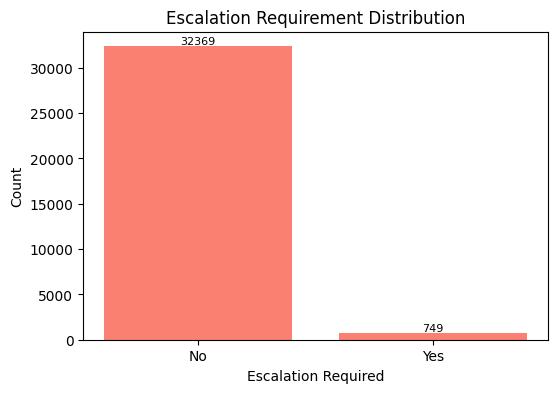

In [9]:
# Count escalations
escalation_counts = outreach_df['Escalation_Required'].value_counts().reset_index()
escalation_counts.columns = ['Escalation_Required', 'Count']
print(escalation_counts)

# Visualization
plt.figure(figsize=(6,4))
bars = plt.bar(escalation_counts['Escalation_Required'], escalation_counts['Count'], color='salmon')
plt.title('Escalation Requirement Distribution')
plt.xlabel('Escalation Required')
plt.ylabel('Count')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

plt.show()


Interpretation:

Understand how many interactions needed escalation.

Helps identify problematic outreach segments.

6. Outreach by Caller

  Caller_Name  Outreach_Count
0       Rudra           11564
1     Prajwal            7218
2       Jyoti            4499
3       Palak            4129
4        Isha            1709
5       Poppy            1345
6    Shrutish            1268
7     Shailja            1171
8     Namrata             111
9     Twinkle              77


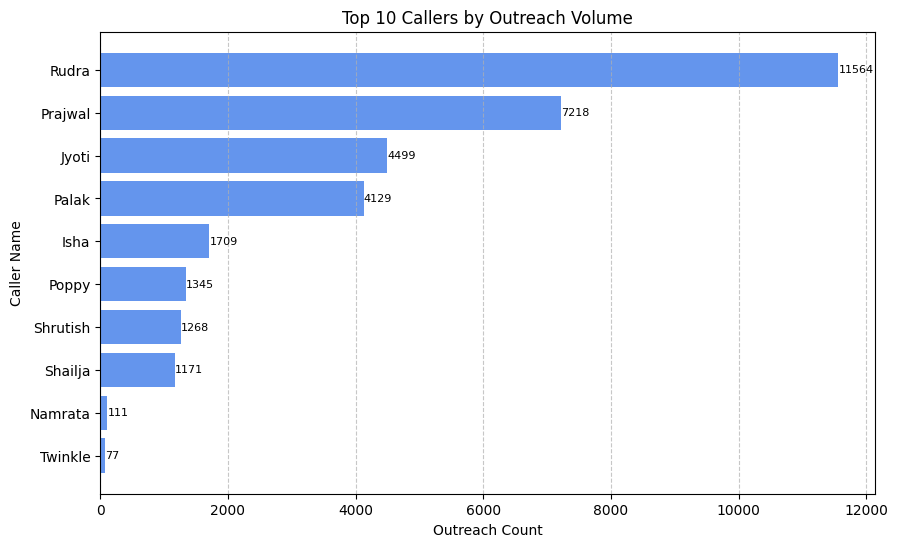

In [10]:
# Top 10 callers by outreach volume
caller_volume = (
    outreach_df.groupby('Caller_Name')['Reference_ID']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'Reference_ID': 'Outreach_Count'})
    .head(10)
)

print(caller_volume)

# Visualization
plt.figure(figsize=(10,6))
bars = plt.barh(caller_volume['Caller_Name'], caller_volume['Outreach_Count'], color='cornflowerblue')
plt.gca().invert_yaxis()  # Highest on top
plt.title('Top 10 Callers by Outreach Volume')
plt.xlabel('Outreach Count')
plt.ylabel('Caller Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=8)

plt.show()

Interpretation:

Spot high-performing or underperforming callers.

Could feed into training or process improvements.

Dataset-2: Cleaned_ApplicantData.csv

Loading Dataset and inspecting

In [11]:
applicant_df = pd.read_csv("Cleaned_ApplicantData.csv")

# Inspect dataset
print(applicant_df.head())
print(applicant_df.info())
print(applicant_df.describe())

   App_ID  Country                        University  Phone_Number
0   12345    India  Illinois Institute of Technology    9823241234
1   12345    India  Illinois Institute of Technology    8805617501
2   12345    India  Illinois Institute of Technology   18019011222
3  347397  Nigeria  Illinois Institute of Technology    7738599513
4  347397  Nigeria  Illinois Institute of Technology  919182706838
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16836 entries, 0 to 16835
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   App_ID        16836 non-null  int64 
 1   Country       16836 non-null  object
 2   University    16836 non-null  object
 3   Phone_Number  16829 non-null  object
dtypes: int64(1), object(3)
memory usage: 526.3+ KB
None
             App_ID
count  1.683600e+04
mean   8.309984e+09
std    1.771971e+11
min    0.000000e+00
25%    4.032695e+05
50%    4.401485e+05
75%    4.644382e+05
max    9.780000e+12


Total applicants

In [12]:
total_applicants = applicant_df['App_ID'].nunique()
print(f"Total Applicants: {total_applicants}")

Total Applicants: 15175


1. Applicants by Country - Horizontal Bar Chart

        Country  Applicant_Count
0         India             5674
1       Unknown             3533
2         Ghana             1927
3       Nigeria             1574
4      Pakistan              608
5          Iran              557
6  South Africa              385
7         Nepal              305
8    Bangladesh              295
9      Ethiopia              200


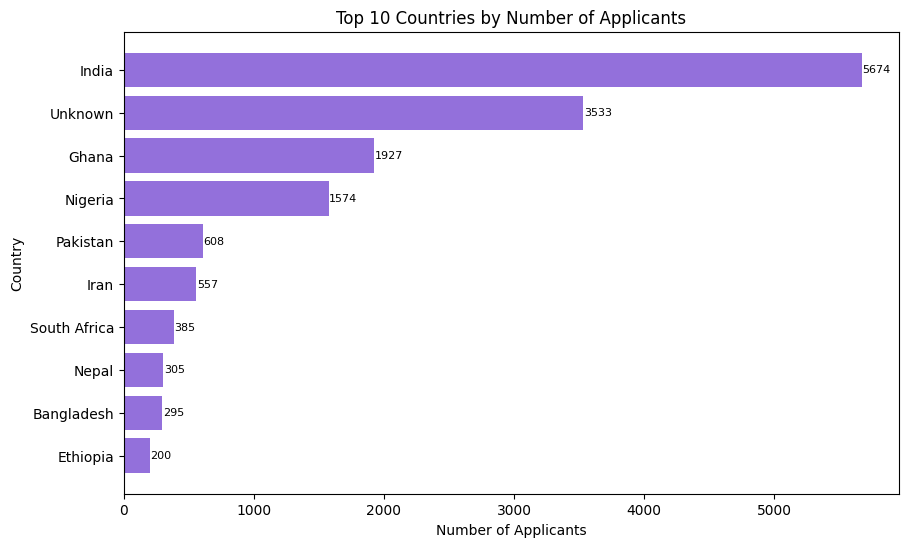

In [12]:
country_counts = applicant_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Applicant_Count']
print(country_counts.head(10))

# Horizontal bar chart with top 10 countries
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.barh(country_counts['Country'].head(10), country_counts['Applicant_Count'].head(10), color='mediumpurple')
plt.gca().invert_yaxis()
plt.title('Top 10 Countries by Number of Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('Country')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=8)

plt.show()

Interpretation: 

Identify top source countries of applicants.

Helps segment-level insights for outreach targeting.

2. Applicants by University - Bar Chart

                         University  Applicant_Count
0  Illinois Institute of Technology            16836


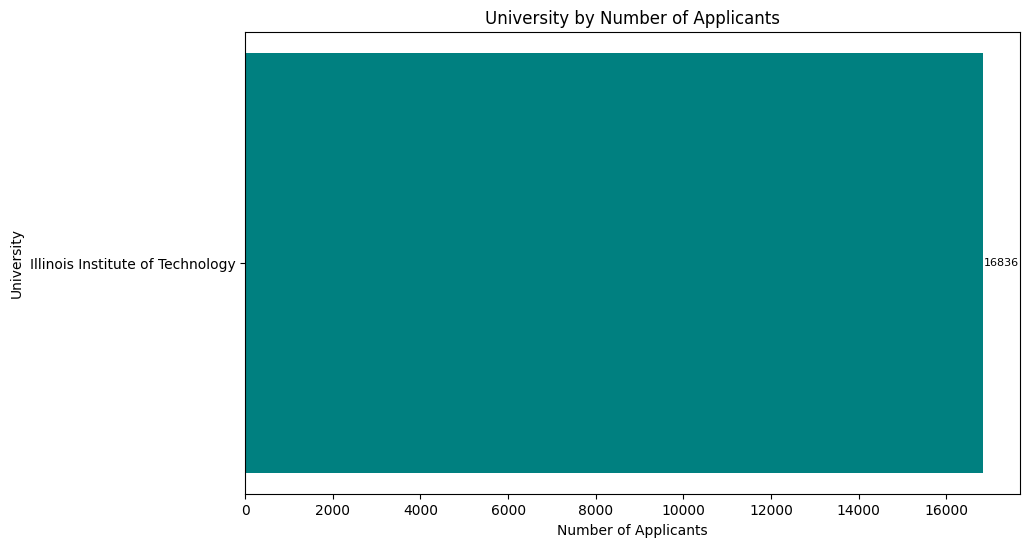

In [13]:
university_counts = applicant_df['University'].value_counts().reset_index()
university_counts.columns = ['University', 'Applicant_Count']
print(university_counts.head(10))

# Horizontal bar chart with top 10 universities
plt.figure(figsize=(10,6))
bars = plt.barh(university_counts['University'].head(10), university_counts['Applicant_Count'].head(10), color='teal')
plt.gca().invert_yaxis()
plt.title('University by Number of Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('University')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=8)

plt.show()


interpretation:

Highlights universities contributing most applicants.

3. Phone number completeness check

In [14]:
missing_phone = applicant_df['Phone_Number'].isna().sum()
print(f"Missing Phone Numbers: {missing_phone}")

# Optional: percentage
missing_percentage = (missing_phone / len(applicant_df)) * 100
print(f"Percentage of Missing Phone Numbers: {missing_percentage:.2f}%")

Missing Phone Numbers: 7
Percentage of Missing Phone Numbers: 0.04%


Interpretation:

Identifies gaps in contact info.

Can impact follow-up or conversion tracking.

Dataset-3: Cleaned_CampaignData.csv

Loading and inspecting the dataset

In [15]:
campaign_df = pd.read_csv("Cleaned_CampaignData.csv")

# Inspect dataset
print(campaign_df.head())
print(campaign_df.info())
print(campaign_df.describe())

         ID                                     Name        Category  Intake  \
0    AANF23   GR GS FA24 Campaign- Admit, No Deposit  Post Admission  AY2024   
1     AND23   GR GS FA24 Campaign- Deposit No Action  Post Admission  AY2024   
2  BPNANF23    GR GS FA24 Campaign- Deposit, No I-20  Post Admission  AY2024   
3   BPNND23         GR GS FA24 Campaign- In Progress   Pre Admission  AY2024   
4  CTKANF23  GR GS FA24 Campaign- Submit, Incomplete   Pre Admission  AY2024   

                         University     Status  Start_Date  
0  Illinois Institute of Technology  Completed  2024-03-20  
1  Illinois Institute of Technology  Completed  2024-09-11  
2  Illinois Institute of Technology  Completed  2024-07-11  
3  Illinois Institute of Technology  Completed  2024-03-06  
4  Illinois Institute of Technology  Completed  2024-03-08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------

1. Campaign count and status distribution

Total Campaigns: 23
      Status  Count
0  Completed     23


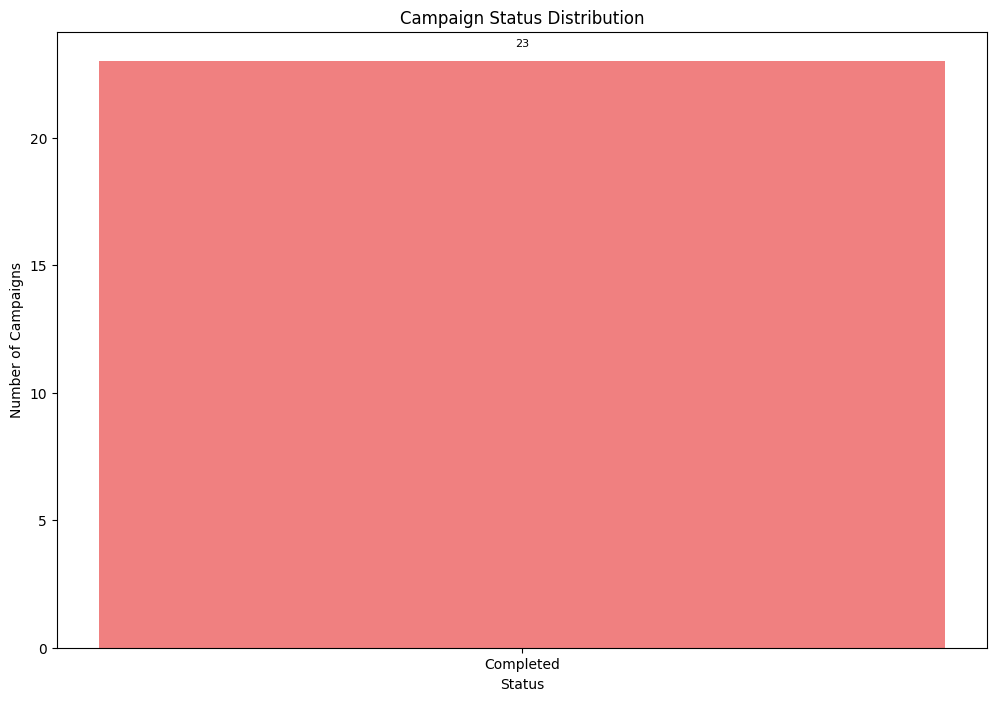

In [16]:
# Total campaigns
total_campaigns = campaign_df['ID'].nunique()
print(f"Total Campaigns: {total_campaigns}")

# Status distribution
status_counts = campaign_df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']
print(status_counts)

# Bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
bars = plt.bar(status_counts['Status'], status_counts['Count'], color='lightcoral')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.title('Campaign Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Campaigns')
plt.show()


Interpretation:

hows how many campaigns are Active, Completed, Paused, etc.

Gives a snapshot of campaign health.

2. Campaigns by Category - pie chart

         Category  Count
0  Post Admission     14
1   Pre Admission      9


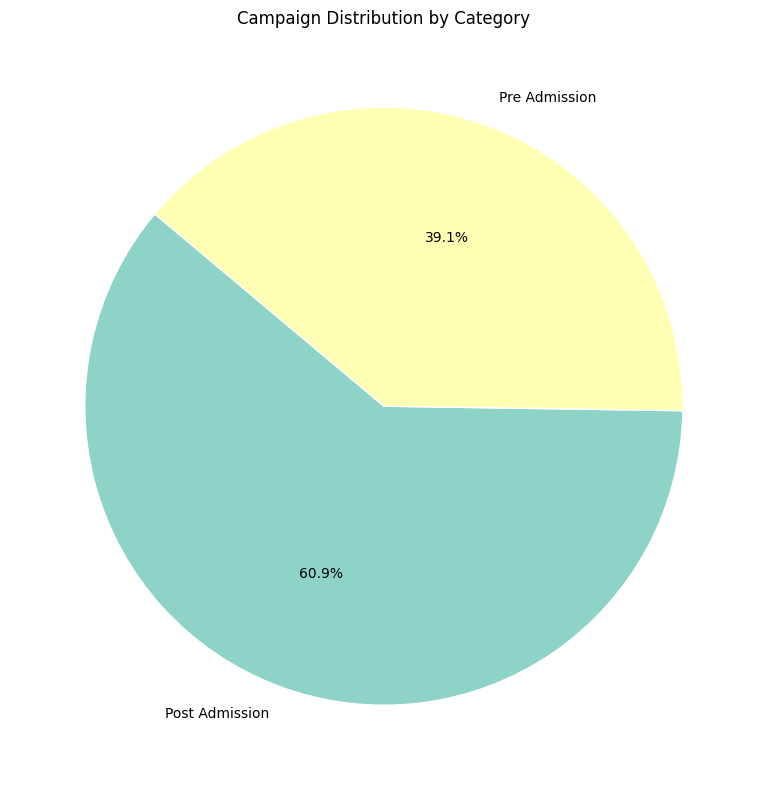

In [17]:
import matplotlib.pyplot as plt

# Prepare data
category_counts = campaign_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print(category_counts)

# Pie chart with good color palette
colors = plt.cm.Set3.colors  # Soft, visually appealing palette

plt.figure(figsize=(8,8))
plt.pie(category_counts['Count'], labels=category_counts['Category'], 
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title('Campaign Distribution by Category')
plt.tight_layout()
plt.show()


Interpretation:

Highlights which campaign categories are most common.

Useful for segment-level insights and prioritization.

3. Campaigns by Intake - Bar Chart

   Intake  Count
0  AY2024     23


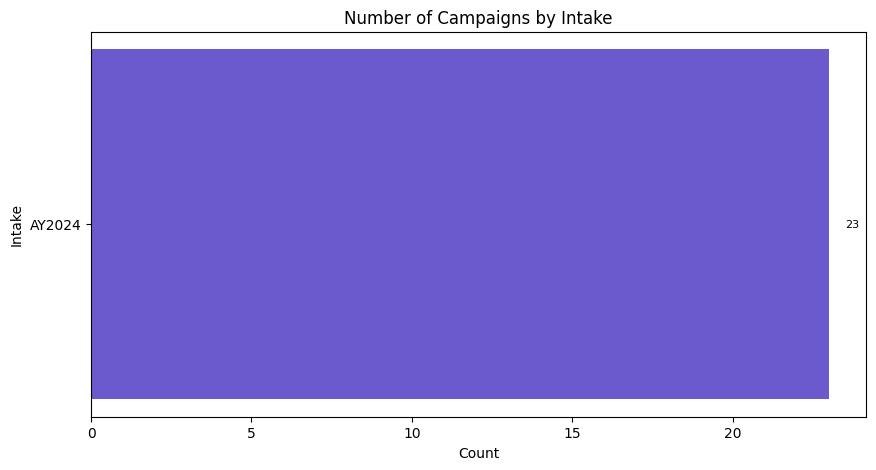

In [18]:
intake_counts = campaign_df['Intake'].value_counts().reset_index()
intake_counts.columns = ['Intake', 'Count']
print(intake_counts)

# Horizontal bar chart
plt.figure(figsize=(10,5))
bars = plt.barh(intake_counts['Intake'], intake_counts['Count'], color='slateblue')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=8)

plt.title('Number of Campaigns by Intake')
plt.xlabel('Count')
plt.ylabel('Intake')
plt.show()


Interpretation:

Understand campaigns targeting different intake periods.

Can help identify seasonal trends or peaks.

4. Campaigns by University - bar Chart

                         University  Count
0  Illinois Institute of Technology     23


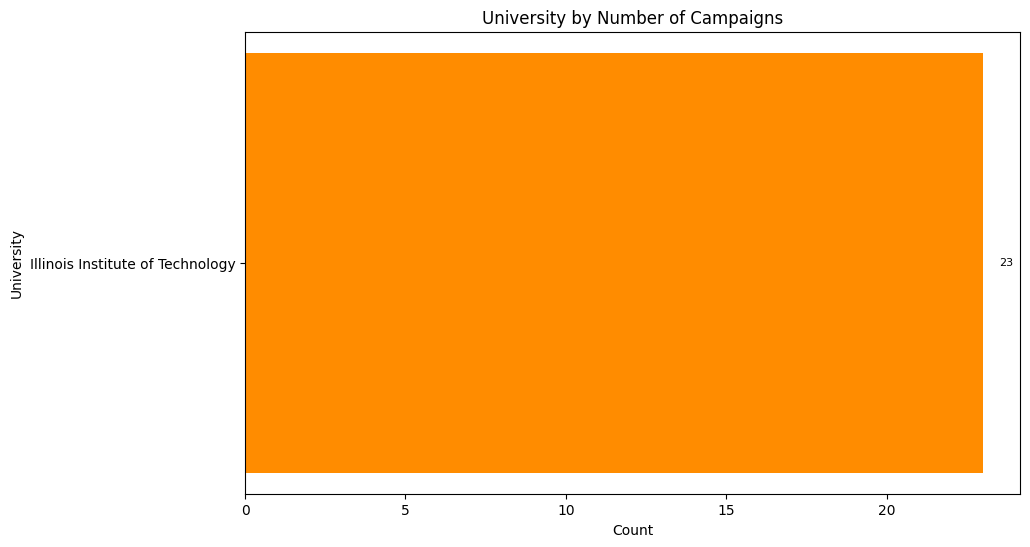

In [19]:
university_counts = campaign_df['University'].value_counts().reset_index()
university_counts.columns = ['University', 'Count']
print(university_counts.head(10))

# Horizontal bar chart (Top 10)
plt.figure(figsize=(10,6))
bars = plt.barh(university_counts['University'].head(10), university_counts['Count'].head(10), color='darkorange')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=8)

plt.title('University by Number of Campaigns')
plt.xlabel('Count')
plt.ylabel('University')
plt.show()


Interpretation:

Highlights universities with the most campaigns.

Useful for segment-level analysis and campaign focus.

5. Campaign start date distribution - Line Chart

  Month_Year  Campaign_Count
0    2023-04               1
1    2023-05               4
2    2023-07               4
3    2024-03               3
4    2024-07               3
5    2024-09               1
6    2024-10               5
7    2024-11               1
8    2024-12               1


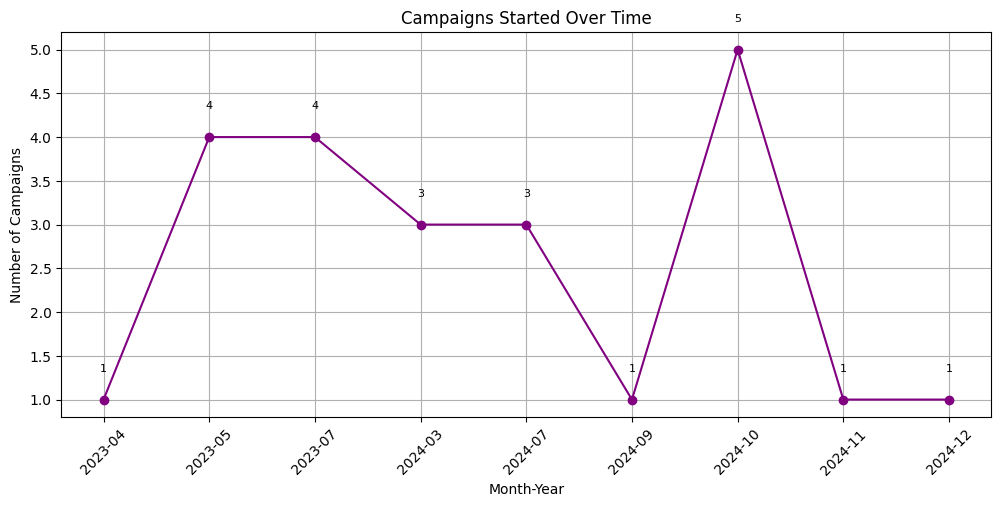

In [20]:
# Convert Start_Date to datetime
campaign_df['Start_Date'] = pd.to_datetime(campaign_df['Start_Date'])

# Extract month-year
campaign_df['Month_Year'] = campaign_df['Start_Date'].dt.to_period('M')

# Count campaigns per month
monthly_campaigns = campaign_df.groupby('Month_Year')['ID'].count().reset_index()
monthly_campaigns.rename(columns={'ID': 'Campaign_Count'}, inplace=True)
print(monthly_campaigns)

# Line chart with values
plt.figure(figsize=(12,5))
plt.plot(monthly_campaigns['Month_Year'].astype(str), monthly_campaigns['Campaign_Count'], marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Campaigns Started Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Campaigns')
plt.grid(True)

# Add value labels on points
for x, y in zip(monthly_campaigns['Month_Year'].astype(str), monthly_campaigns['Campaign_Count']):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', fontsize=8)

plt.show()


Interpretation:

Identifies trends and seasonality in campaign launches.

Useful to align outreach efforts with campaign timing.

## EDA is Complete !